In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
!pip install Pillow
from PIL import Image



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
#Cargar base de datos, descargada de INEGI
df = pd.read_csv('denue_inegi_43_.csv', encoding='ISO-8859-1')
df

C:\Users\User\AppData\Local\Temp\ipykernel_4564\3448686326.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('denue_inegi_43_.csv', encoding='ISO-8859-1')


,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,7702819,01001434225001101000000000S1,2 CONEXION DE SERVICIOS INFORMATICOS,NaN,434225,Comercio al por mayor de equipo y material elé...,0 a 5 personas,CALLE,5 DE MAYO,CALLE,...,Aguascalientes,0638,14,NaN,SERVICIOS@2CONEXION.COM,WWW.2CONEXION.COM,Fijo,21.882623,-102.297289,2019-11
1,6282298,01005431110000031001004190S9,2227 ORGANIZACIÓN SAHUAYO AGUASCALIENTES,IMPULSORA SAHUAYO SA DE CV,431110,Comercio al por mayor de abarrotes,101 a 250 personas,CIRCUITO,AGUASCALIENTES SUR,CIRCUITO,...,Parque Industrial del Valle de Aguascalientes ...,0035,3,NaN,NaN,WWW.SAHUAYO.COM.MX,Fijo,21.963603,-102.279136,2010-07
2,6281310,01005431191000017000002859S8,2251 AGUAS NORTE,BIMBO SA DE CV,431191,Comercio al por mayor de pan y pasteles,251 y más personas,CARRETERA,PANAMERICANA,OTRO (ESPECIFIQUE),...,Coral [Ex-Viñedos],0035,800,NaN,NaN,WWW.BIMBO.COM.MX,Fijo,21.954421,-102.291284,2010-07
3,6281199,01001431191000106000002859S8,2252 AGUAS SUR,BIMBO SA DE CV,431191,Comercio al por mayor de pan y pasteles,101 a 250 personas,CARRETERA,PANAMERICANA SUR,CALLE,...,Aguascalientes,1477,25,NaN,NaN,WWW.BIMBO.COM.MX,Fijo,21.840966,-102.280381,2010-07
4,6281969,01001431110000121001004190S7,2273 AGUASCALIENTES,IMPULSORA SAHUAYO SA DE CV,431110,Comercio al por mayor de abarrotes,101 a 250 personas,CALLE,SOYA,AVENIDA,...,Aguascalientes,1975,16,NaN,NaN,WWW.SAHUAYO.COM.MX,Fijo,21.910507,-102.296908,2010-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168035,6417662,32017431160000033001003869S8,YAKULT,YAKULT SA DE CV,431160,Comercio al por mayor de leche y otros product...,31 a 50 personas,CALLE,PABLO PICASSO,CALLE,...,Guadalupe,0224,16,NaN,NaN,WWW.YAKULT.COM.MX,Fijo,22.751397,-102.501325,2010-07
168036,9041093,32017434222000101000000000M8,ZAC PERFORATIC,ZAC PERFORATIC SA DE CV,434222,Comercio al por mayor de productos químicos pa...,0 a 5 personas,AVENIDA,5 DE MAYO,PRIVADA,...,Guadalupe,0667,16,NaN,NaN,NaN,Fijo,22.755366,-102.524299,2019-11
168037,6417535,32017431160000011000004198S4,ZACATECAS,DANONE DE MEXICO,431160,Comercio al por mayor de leche y otros product...,31 a 50 personas,CALLE,CANTERA,CALLE,...,Guadalupe,0239,4,NaN,NaN,NaN,Fijo,22.740396,-102.503876,2010-07
168038,9252599,32056431160000044000002515S3,ZACATECAS,MARCAS NESTLE SA DE CV,431160,Comercio al por mayor de leche y otros product...,51 a 100 personas,AVENIDA,Tránsito Pesado,CALLE,...,Zacatecas,1220,1,NaN,RAYMUNDO.RODRIGUEZ@MX.NESTLE.COM,NaN,Fijo,22.754184,-102.575988,2020-04


In [10]:
#¿Cuantas abarroteras mayoristas existen?
len(df.id)

168040

Vamos a convertir los datos a geopandas ya que la información cuenta con latitudes y longitudes. Intentemos correrlo con geopandas, sin embargo lo más probable es que no podamos poner el fondo del mapa de México, ya que se encuentran a diferentes escalas 

### Create a GeoDataFrame

In [13]:
#create GeoDataFrame
gdf_mayoristas = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitud, df.latitud))
gdf_mayoristas.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,7702819,01001434225001101000000000S1,2 CONEXION DE SERVICIOS INFORMATICOS,NaN,434225,Comercio al por mayor de equipo y material elé...,0 a 5 personas,CALLE,5 DE MAYO,CALLE,...,0638,14,NaN,SERVICIOS@2CONEXION.COM,WWW.2CONEXION.COM,Fijo,21.882623,-102.297289,2019-11,POINT (-102.29729 21.88262)
1,6282298,01005431110000031001004190S9,2227 ORGANIZACIÓN SAHUAYO AGUASCALIENTES,IMPULSORA SAHUAYO SA DE CV,431110,Comercio al por mayor de abarrotes,101 a 250 personas,CIRCUITO,AGUASCALIENTES SUR,CIRCUITO,...,0035,3,NaN,NaN,WWW.SAHUAYO.COM.MX,Fijo,21.963603,-102.279136,2010-07,POINT (-102.27914 21.96360)
2,6281310,01005431191000017000002859S8,2251 AGUAS NORTE,BIMBO SA DE CV,431191,Comercio al por mayor de pan y pasteles,251 y más personas,CARRETERA,PANAMERICANA,OTRO (ESPECIFIQUE),...,0035,800,NaN,NaN,WWW.BIMBO.COM.MX,Fijo,21.954421,-102.291284,2010-07,POINT (-102.29128 21.95442)
3,6281199,01001431191000106000002859S8,2252 AGUAS SUR,BIMBO SA DE CV,431191,Comercio al por mayor de pan y pasteles,101 a 250 personas,CARRETERA,PANAMERICANA SUR,CALLE,...,1477,25,NaN,NaN,WWW.BIMBO.COM.MX,Fijo,21.840966,-102.280381,2010-07,POINT (-102.28038 21.84097)
4,6281969,01001431110000121001004190S7,2273 AGUASCALIENTES,IMPULSORA SAHUAYO SA DE CV,431110,Comercio al por mayor de abarrotes,101 a 250 personas,CALLE,SOYA,AVENIDA,...,1975,16,NaN,NaN,WWW.SAHUAYO.COM.MX,Fijo,21.910507,-102.296908,2010-07,POINT (-102.29691 21.91051)


In [16]:
gdf_mayoristas.dtypes

id               int64
clee            object
nom_estab       object
raz_social      object
codigo_act       int64
nombre_act      object
per_ocu         object
tipo_vial       object
nom_vial        object
tipo_v_e_1      object
nom_v_e_1       object
tipo_v_e_2      object
nom_v_e_2       object
tipo_v_e_3      object
nom_v_e_3       object
numero_ext     float64
letra_ext       object
edificio        object
edificio_e      object
numero_int     float64
letra_int       object
tipo_asent      object
nomb_asent      object
tipoCenCom      object
nom_CenCom      object
num_local       object
cod_postal     float64
cve_ent          int64
entidad         object
cve_mun          int64
municipio       object
cve_loc          int64
localidad       object
ageb            object
manzana          int64
telefono        object
correoelec      object
www             object
tipoUniEco      object
latitud        float64
longitud       float64
fecha_alta      object
geometry      geometry
dtype: obje

<AxesSubplot:>

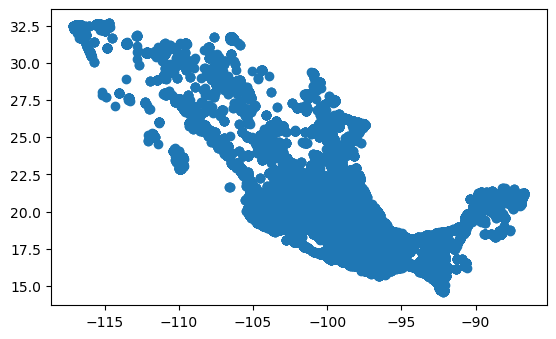

In [19]:
gdf_mayoristas.plot()

<AxesSubplot:>

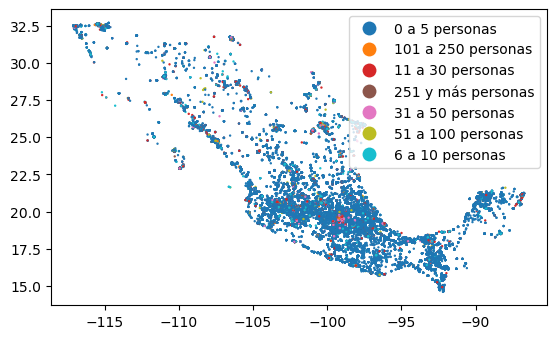

In [23]:
fig, ax = plt.subplots(1, 1)

gdf_mayoristas.plot(column='per_ocu', ax=ax, legend=True, markersize=0.5)

#inegi: 
#el marco geoestadístico
#https://www.inegi.org.mx/temas/mg/

![marco-geoestadistico.jpeg](C:\Users\User\Maestria\Tesis\marco-geoestadistico.jpeg)
